In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Basic Operations

In [69]:
df = pd.read_csv('data/province_weather.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Shortnam       13 non-null     object 
 1   Region         13 non-null     object 
 2   Temperature    13 non-null     float64
 3   Precipitation  13 non-null     float64
dtypes: float64(2), object(2)
memory usage: 548.0+ bytes


In [70]:
df.head()

,Shortnam,Region,Temperature,Precipitation
0,NL,Newfoundland and Labrador,-6.0,71.0
1,PEI,Prince Edward Island,-1.0,34.0
2,NS,Nova Scotia,-18.0,2.0
3,NB,New Brunswick,-20.0,4.0
4,QC,Quebec,0.0,5.0


In [71]:

weather = df.copy()
weather['snow'] = (weather['Temperature'] * weather['Precipitation']) < -10
weather.head()

,Shortnam,Region,Temperature,Precipitation,snow
0,NL,Newfoundland and Labrador,-6.0,71.0,True
1,PEI,Prince Edward Island,-1.0,34.0,True
2,NS,Nova Scotia,-18.0,2.0,True
3,NB,New Brunswick,-20.0,4.0,True
4,QC,Quebec,0.0,5.0,False


In [72]:
weather.sort_values(by='Region', ascending=True).head()

,Shortnam,Region,Temperature,Precipitation,snow
8,AB,Alberta,-2.0,21.0,True
9,BC,British Columbia,-17.0,91.0,True
6,MB,Manitoba,-12.0,58.0,True
3,NB,New Brunswick,-20.0,4.0,True
0,NL,Newfoundland and Labrador,-6.0,71.0,True


In [73]:
weather_filtered = weather[weather['Region'] == 'Alberta']
weather_filtered.head()

,Shortnam,Region,Temperature,Precipitation,snow
8,AB,Alberta,-2.0,21.0,True


In [74]:
weather_filtered = weather[(weather['Precipitation'] > 10) & (weather['Temperature'] > -10)]
weather_filtered.head()

,Shortnam,Region,Temperature,Precipitation,snow
0,NL,Newfoundland and Labrador,-6.0,71.0,True
1,PEI,Prince Edward Island,-1.0,34.0,True
5,ON,Ontario,0.0,59.0,False
8,AB,Alberta,-2.0,21.0,True


# Applying Functions

In [75]:
def c_to_f(c):
    return c * 9/5 + 32

weather['Temperature_F'] = weather['Temperature'].apply(c_to_f)
weather.head()

,Shortnam,Region,Temperature,Precipitation,snow,Temperature_F
0,NL,Newfoundland and Labrador,-6.0,71.0,True,21.2
1,PEI,Prince Edward Island,-1.0,34.0,True,30.2
2,NS,Nova Scotia,-18.0,2.0,True,-0.4
3,NB,New Brunswick,-20.0,4.0,True,-4.0
4,QC,Quebec,0.0,5.0,False,32.0


In [76]:
temp_2010 = [-2, -14, -6, -19, -8, -11, -3, -17, -9, -4, -13, -5, -10]
temp_2011 = [-5, -10, -15, -3, -18, -7, -12, -1, -20, -8, -6, -9, -11]

weather['Temperature_2010'] = temp_2010
weather['Temperature_2011'] = temp_2011

weather['Temperature_Diff'] = weather['Temperature_2011'] - weather['Temperature_2010']
weather.head()

,Shortnam,Region,Temperature,Precipitation,snow,Temperature_F,Temperature_2010,Temperature_2011,Temperature_Diff
0,NL,Newfoundland and Labrador,-6.0,71.0,True,21.2,-2,-5,-3
1,PEI,Prince Edward Island,-1.0,34.0,True,30.2,-14,-10,4
2,NS,Nova Scotia,-18.0,2.0,True,-0.4,-6,-15,-9
3,NB,New Brunswick,-20.0,4.0,True,-4.0,-19,-3,16
4,QC,Quebec,0.0,5.0,False,32.0,-8,-18,-10


In [77]:
weather = weather[['Shortnam', 'Region', 'Temperature_2010', 'Temperature_2011', 'Precipitation']]
weather = weather.rename(columns={'Shortnam': 'Province', 'Precipitation' : 'Precipitation_2010'})
weather.head()

,Province,Region,Temperature_2010,Temperature_2011,Precipitation_2010
0,NL,Newfoundland and Labrador,-2,-5,71.0
1,PEI,Prince Edward Island,-14,-10,34.0
2,NS,Nova Scotia,-6,-15,2.0
3,NB,New Brunswick,-19,-3,4.0
4,QC,Quebec,-8,-18,5.0


In [78]:
weather['Precipitation_2011'] = weather['Precipitation_2010'] * 1.1
weather.head()

,Province,Region,Temperature_2010,Temperature_2011,Precipitation_2010,Precipitation_2011
0,NL,Newfoundland and Labrador,-2,-5,71.0,78.1
1,PEI,Prince Edward Island,-14,-10,34.0,37.4
2,NS,Nova Scotia,-6,-15,2.0,2.2
3,NB,New Brunswick,-19,-3,4.0,4.4
4,QC,Quebec,-8,-18,5.0,5.5


In [79]:
weather['snow_2010'] = (weather['Temperature_2010'] * weather['Precipitation_2010']) < -10
weather['snow_2011'] = (weather['Temperature_2011'] * weather['Precipitation_2011']) < -10
weather.head()

,Province,Region,Temperature_2010,Temperature_2011,Precipitation_2010,Precipitation_2011,snow_2010,snow_2011
0,NL,Newfoundland and Labrador,-2,-5,71.0,78.1,True,True
1,PEI,Prince Edward Island,-14,-10,34.0,37.4,True,True
2,NS,Nova Scotia,-6,-15,2.0,2.2,True,True
3,NB,New Brunswick,-19,-3,4.0,4.4,True,True
4,QC,Quebec,-8,-18,5.0,5.5,True,True


# Visualizing Data

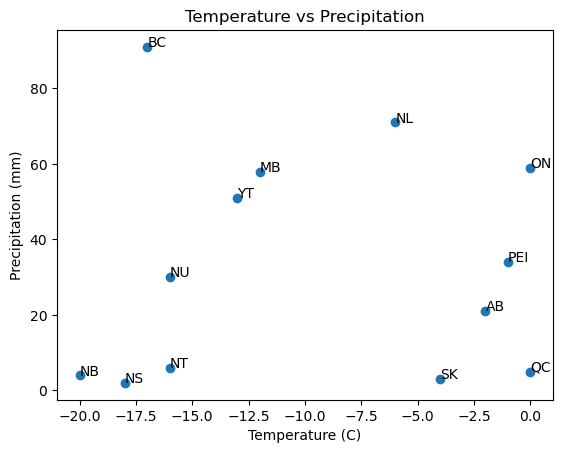

In [80]:
weather = df.copy()

# Plot the data
plt.scatter(weather['Temperature'], weather['Precipitation'])
for i in range(len(weather)):
    plt.text(weather['Temperature'][i], weather['Precipitation'][i], weather['Shortnam'][i])
plt.xlabel('Temperature (C)')
plt.ylabel('Precipitation (mm)')
plt.title('Temperature vs Precipitation')
plt.show()

# Task

1. Add the temperature data from 2010 and 2011 to the data set, convert the temperature data to Fahrenheit and visualize the temperature change.

2. For the 3 warmest provinces in 2010, visualize the temperature over the years.

3. Run a regression analysis on the temperature data against precipitation data for the years 2010 and 2011.

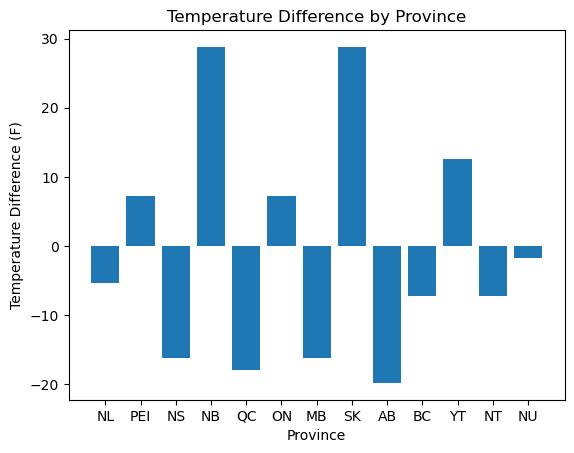

In [81]:
weather = df.copy()
weather['temp_2010'] = temp_2010
weather['temp_2011'] = temp_2011

weather['temp_2010'] = weather['temp_2010'].apply(c_to_f)
weather['temp_2011'] = weather['temp_2011'].apply(c_to_f)

weather['temp_diff'] = weather['temp_2011'] - weather['temp_2010']

# Each province's temperature difference
plt.bar(weather['Shortnam'], weather['temp_diff'])
plt.xlabel('Province')
plt.ylabel('Temperature Difference (F)')
plt.title('Temperature Difference by Province')
plt.show()

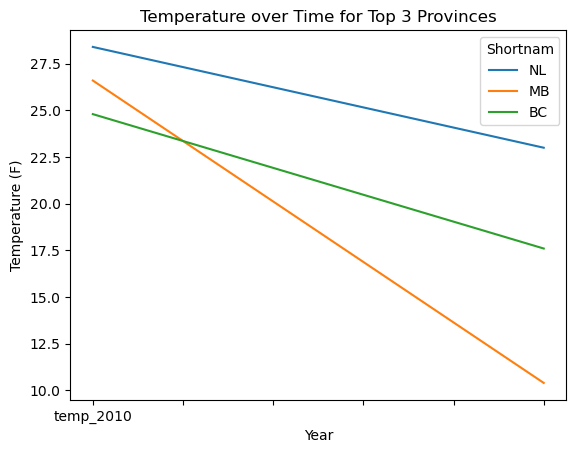

In [82]:
top_3 = weather.sort_values(by='temp_2010', ascending=False).head(3)

# Temperature over time for the top 3 provinces with provinces as labels and years as x-axis
top_3 = top_3.set_index('Shortnam')
top_3 = top_3[['temp_2010', 'temp_2011']]
top_3 = top_3.T

top_3.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.title('Temperature over Time for Top 3 Provinces')
plt.show()

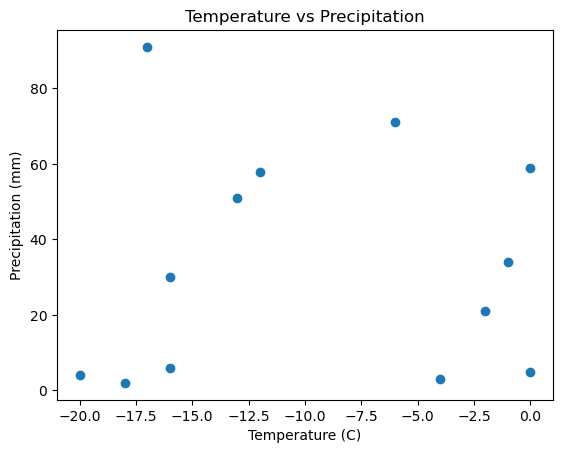

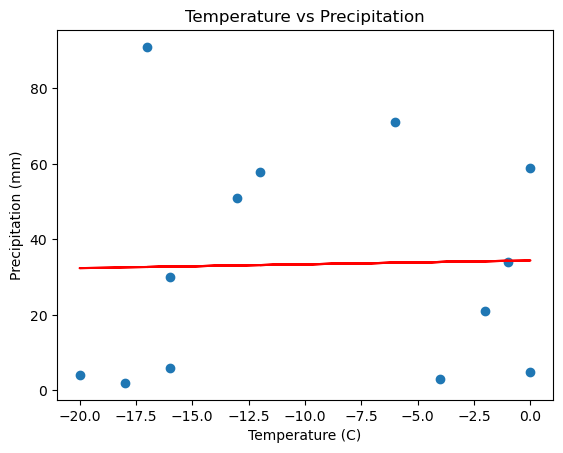

/home/sjone9/miniconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Precipitation   R-squared (uncentered):                   0.352
Model:                            OLS   Adj. R-squared (uncentered):              0.298
Method:                 Least Squares   F-statistic:                              6.516
Date:                Tue, 16 Jul 2024   Prob (F-statistic):                      0.0253
Time:                        01:30:25   Log-Likelihood:                         -64.870
No. Observations:                  13   AIC:                                      131.7
Df Residuals:                      12   BIC:                                      132.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature    -2.1699      0.850     -2.553      0.025      -4.022      -0.318
==============================================================================
Omnibus:                        1.453   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                0.815
Skew:                          -0.136   Prob(JB):                        0.665
Kurtosis:                       1.803   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
regression = weather[['Temperature', 'Precipitation']]

# Scatter plot of temperature vs precipitation
plt.scatter(regression['Temperature'], regression['Precipitation'])
plt.xlabel('Temperature (C)')
plt.ylabel('Precipitation (mm)')
plt.title('Temperature vs Precipitation')
plt.show()

# Linear regression
x = regression['Temperature']
y = regression['Precipitation']
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, m*x + b, color='red')
plt.xlabel('Temperature (C)')
plt.ylabel('Precipitation (mm)')
plt.title('Temperature vs Precipitation')
plt.show()

# Regresison results
model = sm.OLS(y, x).fit()
model.summary()